# singular value decomposition (SVD)

In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(1234)

## Generating 2D example

Generating 5 x 2dim data  

Important Note: python handle vectors in horizontal form.  

Firstly, $X$ is centerized. Each feature has 0-mean.

In [2]:
X = np.arange(10).reshape(5, 2)+ np.random.rand(5,2)*2
print(f'X=')
print(f'{X}\n')

# convert X in 0-mean form; X_centered (Xc)
X_centered = X - X.mean(axis=0)

print('after 0-mean process')
print(f'X_centered=')
print(f'{X_centered}')

X=
[[ 0.3830389   2.24421754]
 [ 2.87545548  4.57071717]
 [ 5.55995162  5.54518521]
 [ 6.55292851  8.60374436]
 [ 9.91627871 10.75186527]]

after 0-mean process
X_centered=
[[-4.67449174 -4.09892837]
 [-2.18207516 -1.77242874]
 [ 0.50242097 -0.7979607 ]
 [ 1.49539787  2.26059845]
 [ 4.85874806  4.40871936]]


In [3]:
# confirm centered X (X_centered) 
# mean of each dimension is normalized to 0
print(f' mean of 1st dimension of X = {np.mean(X[:,0])}')
print(f' mean of 1st dimension of X_centered = {np.mean(X_centered[:,0])}')

 mean of 1st dimension of X = 5.057530642532645
 mean of 1st dimension of X_centered = 1.7763568394002506e-16


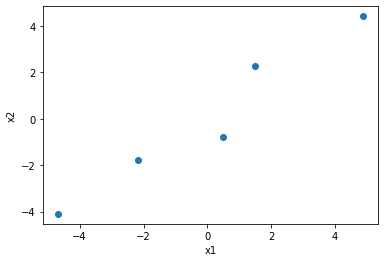

In [4]:
#graph frame
fig = plt.figure()
plt.xlabel("x1")
plt.ylabel("x2")

#plot
plt.scatter(X_centered[:,0], X_centered[:,1])
plt.show()

### Perform SVD on $X_{centered}$

This example perform SVD on $X_{centered}$.  
You can perform SVD also on $X$ (of course, it works as well).  


$X_{centered} = U \Sigma V^T $

$U$ : left singular matrix  
$s$ : singular values  
$V$ : right singular matrix  

$S$ : covariance matrix.  $s$  is its diagonal element.

In [5]:
# Perform SVD
U, s, Vt = np.linalg.svd(X_centered)

# create a cov matrix S from s
m, n = X.shape
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

u1 = U[0, :]
u2 = U[1, :]

v1 = Vt.T[:, 0]
v2 = Vt.T[:, 1]

In [6]:
print(f'X_centered = {X_centered.shape}')
print('\n=======')
print(f'U.shape = {U.shape}')
print(f's.shape = {s.shape}')
print(f'Vt.shape = {Vt.shape}')

print('\n=======')

print(f'U (u1, u2, u3, u4, u5) =\n {U}')
print('--------')
print('left singular vector')
print('first (u1) and second vector (u2) of U')
print(f'u1  = {u1}')
print(f'u2  = {u2}')

print('\n=======')

print(f's = {s}' )

print(f'S = \n {S}' )


print('\n=======')
print(f'Vt (v1, v2) =\n {Vt}')
print('-------')
print('right singular vectors')
print('first (v1) and second vector (v2); they are in horizontal direction')
print(f'v1  = {v1}')
print(f'v2  = {v2}')

X_centered = (5, 2)

U.shape = (5, 5)
s.shape = (2,)
Vt.shape = (2, 2)

U (u1, u2, u3, u4, u5) =
 [[-0.63268355 -0.13774659 -0.0972044   0.33001959  0.67998219]
 [-0.28560492 -0.1538504   0.77809742 -0.53291637  0.07296872]
 [-0.01752486  0.8015571   0.43322058  0.41164497  0.00821214]
 [ 0.26795549 -0.55898045  0.43771785  0.6414446  -0.11266149]
 [ 0.66785783  0.04902035  0.07641155 -0.16181611  0.72079105]]
--------
left singular vector
first (u1) and second vector (u2) of U
u1  = [-0.63268355 -0.13774659 -0.0972044   0.33001959  0.67998219]
u2  = [-0.28560492 -0.1538504   0.77809742 -0.53291637  0.07296872]

s = [9.82329701 1.1566355 ]
S = 
 [[9.82329701 0.        ]
 [0.         1.1566355 ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]

Vt (v1, v2) =
 [[ 0.73473637  0.67835276]
 [ 0.67835276 -0.73473637]]
-------
right singular vectors
first (v1) and second vector (v2); they are in horizontal direction
v1  = [0.73473637 0.67835276]
v2  = [ 0.67835276 -

### confirm SVD works appropriately

In [7]:
reconstructedX = U.dot(S).dot(Vt)
print(f'reconstructedX = \n {reconstructedX}\n')

print(f'original X_centered = \n {X_centered}')

print('\n Are these two close enough ? ')
np.allclose(reconstructedX, X_centered)


reconstructedX = 
 [[-4.67449174 -4.09892837]
 [-2.18207516 -1.77242874]
 [ 0.50242097 -0.7979607 ]
 [ 1.49539787  2.26059845]
 [ 4.85874806  4.40871936]]

original X_centered = 
 [[-4.67449174 -4.09892837]
 [-2.18207516 -1.77242874]
 [ 0.50242097 -0.7979607 ]
 [ 1.49539787  2.26059845]
 [ 4.85874806  4.40871936]]

 Are these two close enough ? 


True

### calculating scores in compressed domain

$Y = X_{centered} V = U\Sigma $

Confirm those calulations have same values.


In [8]:
# scores in compressed domain Y
Y_xv=X_centered.dot(Vt.T)
print(Y_xv)
Y=Y_xv

[[-6.21503846 -0.1593226 ]
 [-2.80558191 -0.17794884]
 [-0.17215188  0.9271094 ]
 [ 2.63220639 -0.64653664]
 [ 6.56056586  0.05669867]]


In [9]:
# scores in compressed domain Y (by different calculation)
Y_us = U.dot(S)
print(Y_us)

[[-6.21503846 -0.1593226 ]
 [-2.80558191 -0.17794884]
 [-0.17215188  0.9271094 ]
 [ 2.63220639 -0.64653664]
 [ 6.56056586  0.05669867]]


### See the data variance ($\sigma^2(Y)$) on the compressed feature space ($V$)

This value indicate the importance of the singular vector $v$.

In [10]:
# the variance on the first singular scores
# (variance in v1 direction)
np.var(Y[:,0])

19.299432833941772

In [11]:
# the variance on the second singular scores
# (variance in v2 direction)
np.var(Y[:,1])

0.26756113685636845

### The ratio of singular values $\sigma_1 / \sigma_2$ is equal to $\sigma_{Y_1} / \sigma_{Y_2}$ 


In [12]:
# The ratio of singular values
print(f' First and second singular values s1, s2 and their ratio = {s[0], s[1], s[0]/s[1]}')


 First and second singular values s1, s2 and their ratio = (9.823297011172412, 1.1566355019114023, 8.492992818341548)


In [13]:
# The ratio of 
print(f' SD of data distribution on  v1, v2 axis and their ratio = {np.std(Y[:,0]), np.std(Y[:,1]), np.std(Y[:,0])/np.std(Y[:,1]) }')
print(np.std(Y[:,0]/np.std(Y[:,1])))

 SD of data distribution on  v1, v2 axis and their ratio = (4.393111976030405, 0.5172631214926968, 8.492992818341547)
8.492992818341547
